In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and convert the training and test dataset. This will convert the csv to dataframe.
data_train = pd.read_csv('/Users/vikramkalta/Desktop/Assignment_AI/Fashion_MNIST_Data/fashion-mnist_train.csv')
data_test = pd.read_csv('/Users/vikramkalta/Desktop/Assignment_AI/Fashion_MNIST_Data/fashion-mnist_test.csv')

# Data cleanup
# Check the duplicates.
duplicates = data_train.duplicated().sum()
# Remove duplicates.
data_train.drop_duplicates(inplace=True)
# We want to check all the unique labels present in the data.
labels = data_train.label.unique()
# plt.pie(x=data_train.groupby(['label']).count()['pixel1'], labels=data_train.groupby(['label']).count().index)

<AxesSubplot:title={'center':'Elbow Graph'}, xlabel='K', ylabel='error_rate'>

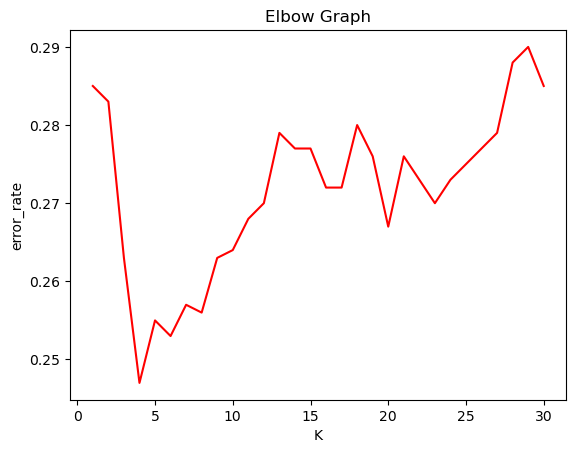

In [2]:
# Data preprocessing & pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
# Drop the label column from training set and call it axis 1
X = data_train.drop('label', axis=1)
y = data_train.label
# print(y)
xx = X[0:1000]
yy = y[0:1000]
# We need to create a normalizer instance using MinMaxScaler object.
normalize = MinMaxScaler()
# This will create different models for different values of k, in order to find the optimal
# value of k using elbow graph
test_error_rate = []
train_error_rate = []
ran = 32
for k in range(1, ran):
    # Initialize a KNN model object with k
    knn = KNeighborsClassifier(k)
    # We define the operations to be performed in the pipeline in a sequence. Here we first
    # normalize the data and then pass the estimator.
    pipeline = [('normalize', normalize), ('knn', knn)]
    pipe = Pipeline(steps = pipeline)
    # We perform 5-fold cross validation.
    cross_dict = cross_validate(pipe, xx, yy, cv=10, scoring='accuracy', return_train_score=True)
    # capturing train and test error rate for elbow graph
    test_error_rate.append(cross_dict['test_score'].mean())
#     train_error_rate.append(cross_dict['train_score'].mean())

# train_error_rate = [1 - acc for acc in train_error_rate]
test_error_rate = [1 - acc for acc in test_error_rate]
plt.title('Elbow Graph')
plt.xlabel('K')
plt.ylabel('error_rate')
sns.lineplot(x = range(1,ran), y = test_error_rate, color = 'red')

In [4]:
# Instantiating a knn object with k=5, since 5 produced the least error rate.
knn = KNeighborsClassifier(n_neighbors=5)
# Normalize the predictor.
X_norm = normalize.fit_transform(xx)
# Fit the transformed data.
knn.fit(X_norm, yy)
# Making predictions from the training dataset
y_pred = knn.predict(X_norm)
# print(y_pred)

The train accuracy score is 83.5


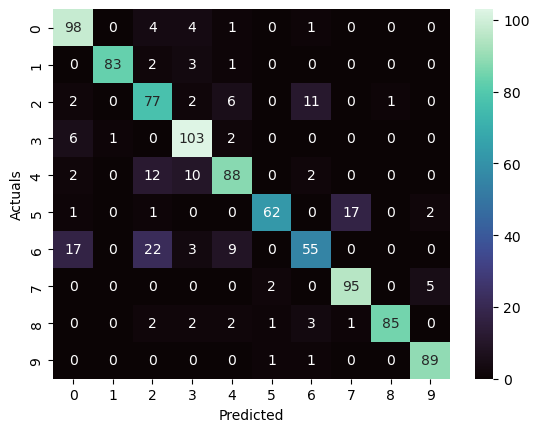

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# We create confusion matrix for the training set
sns.heatmap(confusion_matrix(yy, y_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
# print(classification_report(yy, y_pred))
# Get the accuracy_score
training_data_accuracy = round(100 * accuracy_score(yy, y_pred), 2)
print(f'The training data accuracy score is {training_data_accuracy}')

The test accuracy score is 76.25


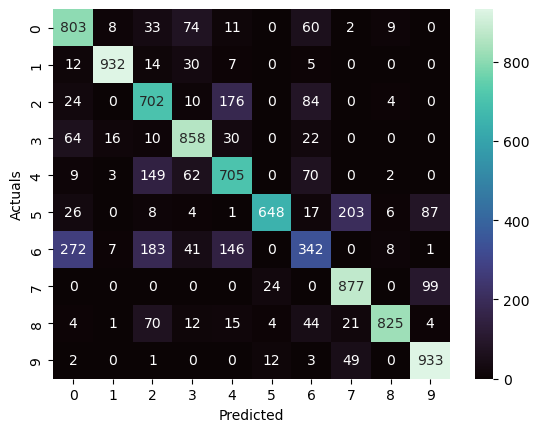

In [7]:
# Preprocessing of the test dataset
data_test.head()
# Check null values
data_test.isnull().sum().sum()
# splitting the testing set into predictor and target variables
X_test = data_test.drop('label', axis = 1)
y_test = data_test.label
# Normalize the test dataset
X_test_norm = normalize.transform(X_test)
# Make predictions from the test dataset using the same knn model
y_test_pred = knn.predict(X_test_norm)
# Now we evaluate the model using confusion matrix for this test dataset
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, cmap = 'mako', fmt = '.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
# print(classification_report(y_test, y_test_pred))
# Get the accuracy score
test_accuracy = round(100 * accuracy_score(y_test, y_test_pred), 2)
print(f'The test accuracy score is {test_accuracy}')